In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm as normal, binom
import bplot as bp
from scipy.optimize import minimize
from scipy.special import loggamma
import patsy
import multiprocessing
from joblib import Parallel, delayed

from math314 import optim, pbootstrap as bootstrap, adjustedR2 as ar2, predict_normal

# 4 December 2019

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/possum.csv")

In [5]:
X = patsy.dmatrix(" ~ C(sex) + headL + C(sex):headL", data=df)
yX = np.c_[df.totalL, X]
betahat = optim(yX)
betahat

array([-28.72151803,  45.08362265,   1.26565346,  -0.51073371])

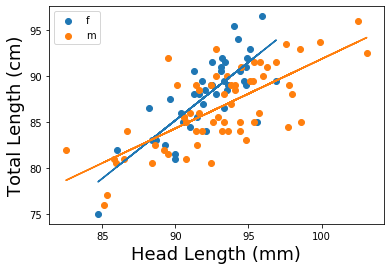

In [6]:
for i, (name, gdf) in enumerate(df.groupby('sex')):
    x = gdf.headL;
    bp.point(x, gdf['totalL'], color=bp.color[i], label = name)
    idx = df['sex'] == name
    bp.line(x, predict_normal(betahat, X[idx, :]), color = bp.color[i])

bp.labels(x="Head Length (mm)", y = "Total Length (cm)", size = 18)
bp.legend()

**Adjusted R^2 allows** us to see which will predict better, separate slopes, or parallel.

In [9]:
ar2(df.totalL, predict_normal(betahat, X), betahat.size)

0.5498521485614905

54.9% of the variation in total length of possums can be explained by the model.

In [12]:
X = patsy.dmatrix(" ~ C(sex) + headL", data=df)
yX = np.c_[df.totalL, X]
betahat = optim(yX)
betahat

array([ 8.26148222, -2.06457844,  0.86431362])

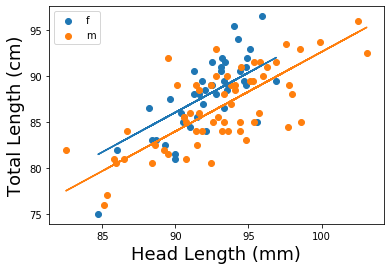

In [14]:
for i, (name, gdf) in enumerate(df.groupby('sex')):
    x = gdf.headL;
    bp.point(x, gdf['totalL'], color=bp.color[i], label = name)
    idx = df['sex'] == name
    bp.line(x, predict_normal(betahat, X[idx, :]), color = bp.color[i])

bp.labels(x="Head Length (mm)", y = "Total Length (cm)", size = 18)
bp.legend()

In [15]:
ar2(df.totalL, predict_normal(betahat, X), betahat.size)

0.5238930725317561

52.4% of the variation in total length of possums can be explained by the model.  
This gives us the impression that the individual slope model is more accurate for this instance.

In [16]:
X = patsy.dmatrix(" ~ C(sex) + headL + C(sex):headL", data=df)
yX = np.c_[df.totalL, X]
betahat = optim(yX)
betahat

array([-28.72128719,  45.08354935,   1.26565096,  -0.5107329 ])

In [17]:
betas = bootstrap(yX, 1001, optim, betahat)

In [19]:
np.percentile(betas, [2.5, 97.5], axis=0).T

array([[-6.11556916e+01,  8.76345680e+00],
       [ 3.57826584e+00,  8.21116114e+01],
       [ 8.55139974e-01,  1.61431863e+00],
       [-9.17743584e-01, -5.94518254e-02]])

The narrowest parameter is the one that we have the best information for where the true parameter lies.

We are 95% confident that if a female possum had no head length, it's total length would be between -61.2 and 8.76cm

We are 95% confident that if a male possum had no head length, it's total length would be between 3.578 and 8.211cm higher than that of a female.

We are 95% confident that for every additional mm of head length a female possum has, it's total length would increase between 0.855 and 1.614cm.

We are 95% confident that for every additional mm of head length a male possum has, it's total length would increase between 0.855-0.917 and 1.614 - 0.0594 cm.